# How to Build a Spam Filter with Naive Bayes Classification

## 1. Objective

We aim to develop a classifier that is able to determine whether a certain text is spam or not (sometimes referred to as "ham" in contrast).
To train and test our algorithm we use a set of comments originally posted below a YouTube video.
The task at hand is text classification, hence, **Multinomial Naive Bayes** is likely a good choice.

In this exercise you will learn the following:
- Data exploration and text preprocessing using `CountVectorizer`.
- Splitting data into training and test sets using `train_test_split`.
- Training a Naive Bayes classifier with `sklearn.naive_bayes`. 
- Make predictions and evaluate the model performance with `sklearn.metrics`.

### 1.1. Prerequisites

Make sure to have the relevant dependencies installed in your environment, namely **pandas**, **scikit-learn** and **seaborn**.
You can use e.g. Anaconda Navigator or install the with the following command:

`` pip install pandas scikit-learn seaborn``

### 1.2. Dataset

We use data from UC Irvine Machine Learning Repository which holds popular datasets often used for research and education purposes.\
In this case, we focus on the **YouTube Spam Collection** dataset authored by T.C. Alberto and J.V. Lochter (__[https://archive.ics.uci.edu/dataset/380/youtube+spam+collection](https://archive.ics.uci.edu/dataset/380/youtube+spam+collection)__).

The collection holds five datasets composed by **1,956 text comments extracted from YouTube music videos** that were popular around 2017.\
The table below lists the datasets, the YouTube video ID, the amount of samples in each class and the total number of samples per dataset.

The collection is composed by one CSV file per dataset, where each line has the following attributes:

| Dataset      | YouTube ID   | # Spam | # Ham | # Total |
| :----------- | :----------: | :----: | :---: | :-----: |
| Psy          | 9bZkp7q19f0  | 175    | 175   | 350     |
| KatyPerry    | CevxZvSJLk8  | 175    | 175   | 350     |
| LMFAO        | KQ6zr6kCPj8  | 236    | 202   | 438     |
| Eminem       | uelHwf8o7_U  | 245    | 203   | 448     |
| Shakira      | pRpeEdMmmQ0  | 174    | 196   | 370     |

Each dataset holds the comments in the following format:
1. `COMMENT_ID`: the unique identifier of a comment (e.g. z12oglnpoq3gjh4om04cfdlbgp2uepyytpw0k)
2. `AUTHOR`: the name of the author (e.g. Francisco Nora)
3. `DATE`: the date when the comment was originally posted (format: YYYY-MM-DDThh\:mm\:ss.f)
4. `CONTENT`: text snippet of the original comment
5. `CLASS`: the _binary_ classification whether the comment has been labelled as spam (`1`) or no spam (`0`)



### 1.3. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Prepare Data

In the following implementation we will focus on one dataset of the collection, namely the **Eminem** dataset (see table above for details).

### 2.1. Quick Exploratory Data Analysis

In [2]:
comments = pd.read_csv('data/youtube_spam_collection/Youtube04-Eminem.csv', sep=',')

In [3]:
comments.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [4]:
comments.shape

(448, 5)

In [5]:
comments['CLASS'].value_counts()

CLASS
1    245
0    203
Name: count, dtype: int64

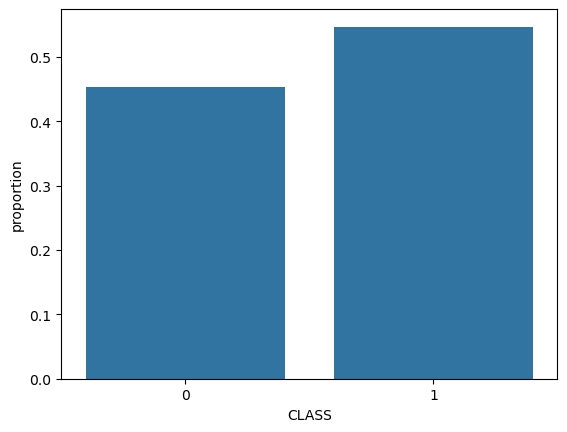

In [6]:
sns.barplot(data = comments['CLASS'].value_counts(normalize=True))
plt.show()

We can conclude that we have a well-balanced dataset with roughly 55\% spam and 45\% ham data.

### 2.2. Preprocess the Data

Turn our data into **bag-of-words** representation using `CountVectorizer`.

In [7]:
# Initialize the CountVectorizer to transform text into a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')

# Convert the messages into numeric form
X = vectorizer.fit_transform(comments['CONTENT'])

y = comments['CLASS']

In [8]:
comments.at[1, 'CONTENT']

'I always end up coming back to this song<br />\ufeff'

In [9]:
print(X[1])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 1432)>
  Coords	Values
  (0, 404)	1
  (0, 282)	1
  (0, 1151)	1
  (0, 203)	1


### 2.3. Split into Training and Test Data

Let us split the dataset into two datasets used for training (80\%) and testing (20\%) purposes. The latter will be used to evaluate our classifier.\
The original dataset is rather balanced already and we wish to keep the same balance in the newly generated datasets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
# Percentage class distribution in test data
y_test.value_counts(normalize=True)*100

CLASS
1    55.555556
0    44.444444
Name: proportion, dtype: float64

In [12]:
# Percentage class distribution in training data
y_train.value_counts(normalize=True)*100

CLASS
1    54.469274
0    45.530726
Name: proportion, dtype: float64

## 3. Train a Naive Bayes Classifier

Remember that we can use a **Multinomial Naive Bayes** classifier for text data.

In [13]:
# Initialize Naive Bayes with Laplace smoothing (alpha=1.0)
model = MultinomialNB(alpha=1.0)

model.fit(X_train, y_train)

MultinomialNB()

## 4. Make predictions and evaluate model performance

### 4.1. Make predictions

In [14]:
# Make predictions on the test data
y_pred = model.predict(X_test)

### 4.2. Evaluate performance

The **accuracy** metric shows how many predictions were correct out of the total predictions. 
A high accuracy indicates that the model is correctly distinguishing between spam and ham messages.

Further metrics to consider are:
- **Precision**: The ratio of true positive predictions (correctly predicted spam) to all predicted positives.
- **Recall**: The ratio of true positives to all actual positives (how well the model identifies spam).
- **F1-Score**: The harmonic mean of precision and recall, providing a balanced evaluation of the model’s performance.

In [15]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.1f}%")

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)

Accuracy: 93.3%
              precision    recall  f1-score    support
0              0.925000  0.925000  0.925000  40.000000
1              0.940000  0.940000  0.940000  50.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.932500  0.932500  0.932500  90.000000
weighted avg   0.933333  0.933333  0.933333  90.000000


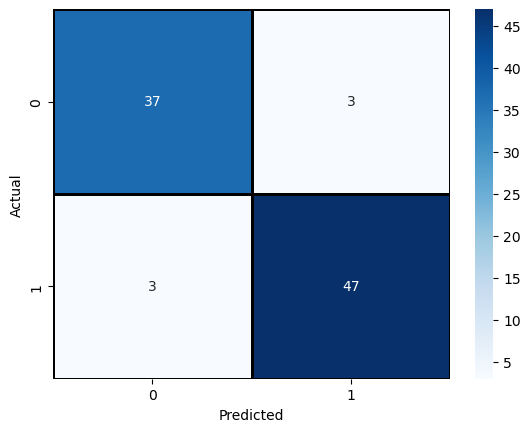

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()